**Set environment**

In [22]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
library(pheatmap)
show_env()

You are working on        Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
REPO DIRECTORY (FD_REPO): /data/reddylab/Kuei/repo 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/work 
DATA DIRECTORY (FD_DATA): /data/reddylab/Kuei/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/log 
PROJECT REF     (FD_REF): /data/reddylab/Kuei/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [2]:
txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

atac_ENCFF333TAT 
atac_ENCFF558BLC 
atac_ENCFF925CYR 
atac_ENCFF948AFM 
dnase_ENCFF185XRG 
dnase_ENCFF274YGF 
fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


In [3]:
txt_region = "fcc_astarr_macs_input_union"
txt_fdiry  = file.path(FD_RES, "region_coverage_fcc", txt_region)
vec = dir(txt_fdiry)
for (txt in vec) {cat(txt, "\n")}

CRISPRi_FlowFISH_K562_Riley_JinWoo 
CRISPRi_Growth_K562_Gersbach_JinWoo 
MPRA_Lenti_K562_Nadav_Vikram 
MPRA_Tiling_K562_Tewhey_Hannah 
STARR_ATAC_K562_Reddy_KS274 
STARR_ATAC_K562_Reddy_KS91 
STARR_ATAC_K562_Reddy_KSMerge 
STARR_WHG_K562_Reddy_A001 
summary 


In [4]:
#txt_fdiry = file.path(FD_RES, "region_coverage_fcc")
#vec = dir(txt_fdiry)
vec = c("fcc_astarr_macs_input_overlap", "fcc_astarr_macs_input_union")
names(vec) = vec

VEC_TXT_REGION = vec
for (txt in vec) {cat(txt, "\n")}

fcc_astarr_macs_input_overlap 
fcc_astarr_macs_input_union 


## Import data

In [5]:
lst = lapply(VEC_TXT_REGION, function(txt_region){
    ### set file directory
    txt_fdiry  = file.path(
        FD_RES, 
        "region_coverage_fcc", 
        txt_region, 
        "summary"
    )
    txt_fname = "result.coverage.score.final.tsv"
    txt_fpath = file.path(txt_fdiry, txt_fname)

    ### read table
    dat = read_tsv(txt_fpath, show_col_types = FALSE)
    return(dat)
})

### assign and show
lst_dat_region_score_import = lst

res = lapply(lst, dim)
print(res)

dat = lst[[1]]
head(dat, 3)

$fcc_astarr_macs_input_overlap
[1] 432603      9

$fcc_astarr_macs_input_union
[1] 639302      9



Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr11,4092109,4092511,chr11:4092109-4092511,-0.4446170,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4094223,4095304,chr11:4094223-4095304,-0.2302549,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4144721,4147004,chr11:4144721-4147004,-0.2878661,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


## Arrange table

In [6]:
txt = "fcc_astarr_macs_input_union"
lst = lst_dat_region_score_import
dat = lst[[txt]]
dat_region_score_import = dat
fun_display_table(head(dat, 3))

Chrom,ChromStart,ChromEnd,Region,Score,Assay_Name,Assay_Type,Assay_Group,Assay_Label
chr11,4092104,4092566,chr11:4092104-4092566,-0.4800155,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4094204,4095676,chr11:4094204-4095676,-0.2046389,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH
chr11,4144511,4147030,chr11:4144511-4147030,-0.2753264,CRISPRi_FlowFISH_K562_Riley_JinWoo,CRISPRi-HCRFF,CRISPRi-HCRFF,CRISPRi-HCR FlowFISH


In [8]:
dat = dat_region_score_import
dat = dat %>% dplyr::select(Region, Assay_Type) %>% dplyr::distinct()

dat_region_score_arrange = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 639302      2


Region,Assay_Type
chr11:4092104-4092566,CRISPRi-HCRFF
chr11:4094204-4095676,CRISPRi-HCRFF
chr11:4144511-4147030,CRISPRi-HCRFF


## Calculate coverage similarity

In [9]:
dat = dat_region_score_arrange
lst = split(dat$Region, dat$Assay_Type)

lst_vec_txt_region = lst
table(dat$Assay_Type)
print(names(lst))


        ASTARR CRISPRi-Growth  CRISPRi-HCRFF          LMPRA          TMPRA 
        246850          80288           1330          68497           1306 
        WSTARR 
        241031 

[1] "ASTARR"         "CRISPRi-Growth" "CRISPRi-HCRFF"  "LMPRA"         
[5] "TMPRA"          "WSTARR"        


In [14]:
fun_jaccard = function(vec1, vec2){
    num_size1 = length(vec1)
    num_size2 = length(vec2)
    num_size_inter = length(intersect(vec1, vec2))
    num_size_union = length(union(vec1, vec2))
    num_sim_jaccard = num_size_inter / num_size_union
    num_sim_overlap = num_size_inter / min(num_size1, num_size2)

    ###
    dat = data.frame(
        "Intersect" = num_size_inter,
        "Union"     = num_size_union,
        "Jaccard"   = num_sim_jaccard,
        "Overlap"   = num_sim_overlap
    )
    return(dat)
}

In [15]:
lst = lst_vec_txt_region
vec = names(lst)
dat = expand.grid(vec, vec)
dat

Var1,Var2
<fct>,<fct>
ASTARR,ASTARR
CRISPRi-Growth,ASTARR
CRISPRi-HCRFF,ASTARR
LMPRA,ASTARR
TMPRA,ASTARR
WSTARR,ASTARR
ASTARR,CRISPRi-Growth
CRISPRi-Growth,CRISPRi-Growth
CRISPRi-HCRFF,CRISPRi-Growth


In [17]:
lst = lst_vec_txt_region
vec = names(lst)
tmp = expand.grid(vec, vec) %>% t %>% as.data.frame
lst = lapply(tmp, function(vec){
    txt1 = vec[1]
    txt2 = vec[2]
    vec1 = lst[[txt1]]
    vec2 = lst[[txt2]]
    
    dat = fun_jaccard(vec1, vec2)
    dat$Assay1 = txt1
    dat$Assay2 = txt2
    return(dat)
})
dat = bind_rows(lst)

### assign and show
dat_summary = dat
print(dim(dat))
head(dat)

[1] 36  6


,Intersect,Union,Jaccard,Overlap,Assay1,Assay2
,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,246850,246850,1.000000000,1.0000000,ASTARR,ASTARR
2,80288,246850,0.325250152,1.0000000,CRISPRi-Growth,ASTARR
3,1330,246850,0.005387887,1.0000000,CRISPRi-HCRFF,ASTARR
4,68497,246850,0.277484302,1.0000000,LMPRA,ASTARR
5,1306,246850,0.005290662,1.0000000,TMPRA,ASTARR
6,241030,246851,0.976418973,0.9999959,WSTARR,ASTARR


In [18]:
dat = dat_summary
dat = dat %>% 
    dplyr::mutate(Value = as.double(Jaccard)) %>% 
    dplyr::select(Assay1, Assay2, Value)

mat = dat %>% 
    tidyr::spread(Assay2, Value) %>% 
    column_to_rownames("Assay1") %>% 
    as.matrix

mat_score_pairwise = mat
mat

,ASTARR,CRISPRi-Growth,CRISPRi-HCRFF,LMPRA,TMPRA,WSTARR
ASTARR,1.000000000,0.325250152,0.005387887,0.27748430,0.005290662,0.976418973
CRISPRi-Growth,0.325250152,1.000000000,0.006883790,0.56899861,0.006376654,0.328912160
CRISPRi-HCRFF,0.005387887,0.006883790,1.000000000,0.01043325,0.137678032,0.005417851
LMPRA,0.277484302,0.568998608,0.010433247,1.00000000,0.013812235,0.280099256
TMPRA,0.005290662,0.006376654,0.137678032,0.01381223,1.000000000,0.005347483
WSTARR,0.976418973,0.328912160,0.005417851,0.28009926,0.005347483,1.000000000


In [19]:
mat = mat_score_pairwise

paletteLength <- 50
#myColor <- colorRampPalette(c("#abd9e9", "white", "#d73027"))(paletteLength)
#myBreaks <- c(seq(-0.1, 0, length.out=ceiling(paletteLength/2) + 1), 
#              seq(1/paletteLength, 1, length.out=floor(paletteLength/2)))

num      = 1
myColor  = colorRampPalette(c("white", "#d73027"))(paletteLength)
myBreaks = seq(0, num, length.out=paletteLength)

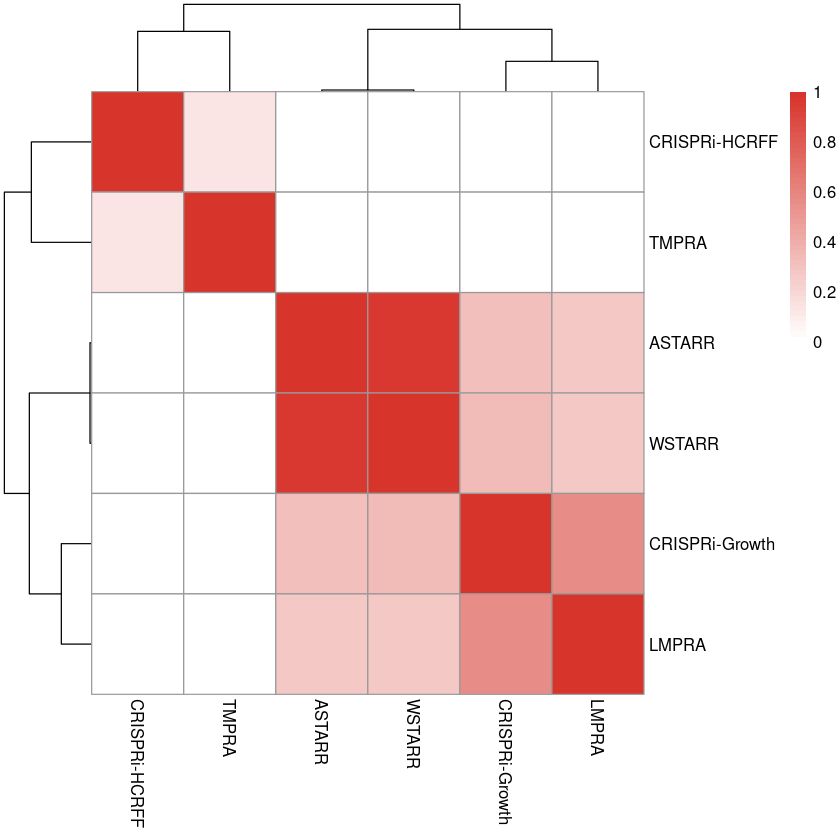

In [23]:
mat = mat_score_pairwise
pheatmap(
    mat,
    color=myColor, 
    breaks=myBreaks
)